Identify which player from a specific club has the most playing time.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
import math
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [78]:
df_games_events = pd.read_csv('AssignmentData/game_events.csv')
df_players = pd.read_csv('AssignmentData/players.csv')
df_club = pd.read_csv('AssignmentData/clubs.csv')
df_app = pd.read_csv('AssignmentData/appearances.csv')

In [79]:
df_app

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,4172154_743395,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


### Data Cleaning for club

In [80]:
df_club

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,5,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,32,27.4,16,50.0,13,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,27.4,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,29,26.2,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,Football Club Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta Bergamasca Calcio S.p.a.,IT1,NaN,25,27.2,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense Futebol Clube,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [81]:
df_club.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'url'],
      dtype='object')

In [82]:
df_club = df_club[
['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name','last_season']
]

### Data Cleaning for players

In [83]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,2027-06-30 00:00:00,MSC GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio
30299,586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,2027-06-30 00:00:00,The Kulture Group,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,2022,410,nicolo-cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,NaN,NaN,75000.0,75000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nicolo-cocetta...,IT1,Udinese Calcio


In [84]:
df_players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [85]:
df_players = df_players[
['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm',
       'current_club_domestic_competition_id',
       'current_club_name']
]

In [86]:
df_app[df_app['player_id'] == 186798]

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
1315811,3888988_186798,3888988,186798,3060,3060,2022-08-20,Andreas Kuen,GR1,0,0,0,0,90
1321640,3888999_186798,3888999,186798,3060,3060,2022-08-28,Andreas Kuen,GR1,1,0,0,0,90
1326792,3889003_186798,3889003,186798,3060,3060,2022-09-04,Andreas Kuen,GR1,1,0,0,1,90
1329273,3889009_186798,3889009,186798,3060,3060,2022-09-10,Andreas Kuen,GR1,0,0,0,0,90
1333689,3889016_186798,3889016,186798,3060,3060,2022-09-17,Andreas Kuen,GR1,0,0,0,0,90
1339074,3889025_186798,3889025,186798,3060,3060,2022-10-02,Andreas Kuen,GR1,0,0,0,0,90
1344006,3889030_186798,3889030,186798,3060,3060,2022-10-10,Andreas Kuen,GR1,0,0,0,0,61
1347586,3889036_186798,3889036,186798,3060,3060,2022-10-16,Andreas Kuen,GR1,0,0,0,0,20
1349682,3942781_186798,3942781,186798,3060,3060,2022-10-19,Andreas Kuen,GRP,0,0,0,0,67
1351579,3889043_186798,3889043,186798,3060,3060,2022-10-22,Andreas Kuen,GR1,0,0,0,0,69


### Get players of a specific club

In [87]:
club_id = 3060
selected_club = df_club[df_club['club_id'] == club_id]
club_last_season = selected_club.iloc[0]['last_season']

# Get players of a specific club
df_club_players = df_players[(df_players['current_club_id'] == club_id)  & (df_players['last_season'] == club_last_season)].copy()

### Get the mean of minutes played by a player

In [104]:
def mean_minutes_played(player_id):
    selected_player_df = df_app[df_app['player_id'] == player_id]
    minutes_played = selected_player_df['minutes_played']
    mean_minutes = minutes_played.mean()
    if pd.isna(mean_minutes):
        return np.nan  # Return NaN if mean is NaN
    return math.ceil(mean_minutes)
    
df_club_players['mean_minutes_played'] = df_club_players['player_id'].apply(mean_minutes_played)

# Remove players with NaN mean_minutes_played
df_club_players = df_club_players.dropna(subset=['mean_minutes_played'])

# Sort players by mean minutes played (ascending)
df_club_players = df_club_players.sort_values(by='mean_minutes_played', ascending=False)
df_club_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name,mean_minutes_played
22611,164729,Panagiotis,Tsintotas,Panagiotis Tsintotas,2023,3060,panagiotis-tsintotas,Greece,Katerini,Greece,1993-07-04,Goalkeeper,Goalkeeper,right,194.0,GR1,Atromitos Athens,89
13078,94924,Maksym,Imerekov,Maksym Imerekov,2023,3060,maksym-imerekov,UdSSR,"Makiivka, Donetsk Oblast",Ukraine,1991-01-23,Centre-Back,Defender,right,186.0,GR1,Atromitos Athens,88
24727,284306,Lucas,Acevedo,Lucas Acevedo,2023,3060,lucas-acevedo,Argentina,Justiciano Posse,Argentina,1991-11-08,Centre-Back,Defender,right,194.0,GR1,Atromitos Athens,86
14764,42942,Georgios,Tzavellas,Georgios Tzavellas,2023,3060,georgios-tzavellas,Greece,Athen,Greece,1987-11-26,Centre-Back,Defender,left,183.0,GR1,Atromitos Athens,86
22459,110668,Laurens,De Bock,Laurens De Bock,2023,3060,laurens-de-bock,Belgium,Dendermonde,Belgium,1992-11-07,Left-Back,Defender,left,179.0,GR1,Atromitos Athens,85
10418,456523,Eder,González,Eder González,2023,3060,eder-gonzalez,Spain,Palma de Mallorca,Spain,1997-01-07,Defensive Midfield,Midfield,right,170.0,GR1,Atromitos Athens,83
1054,407885,Wajdi,Kechrida,Wajdi Kechrida,2023,3060,wajdi-kechrida,France,Nice,Tunisia,1995-11-05,Right-Back,Defender,right,184.0,GR1,Atromitos Athens,78
20879,242760,Kyriakos,Kivrakidis,Kyriakos Kivrakidis,2023,3060,kyriakos-kivrakidis,Germany,Berlin,Greece,1992-07-21,Right-Back,Defender,right,170.0,GR1,Atromitos Athens,78
19570,543529,Aguibou,Camara,Aguibou Camara,2023,3060,aguibou-camara,Guinea,Matam,Guinea,2001-05-20,Attacking Midfield,Midfield,right,170.0,GR1,Atromitos Athens,72
6888,623072,Nikolaos,Athanasiou,Nikolaos Athanasiou,2023,3060,nikolaos-athanasiou,Greece,Athen,Greece,2001-03-16,Left-Back,Defender,left,177.0,GR1,Atromitos Athens,72


### Visualize mean minutes played for all players

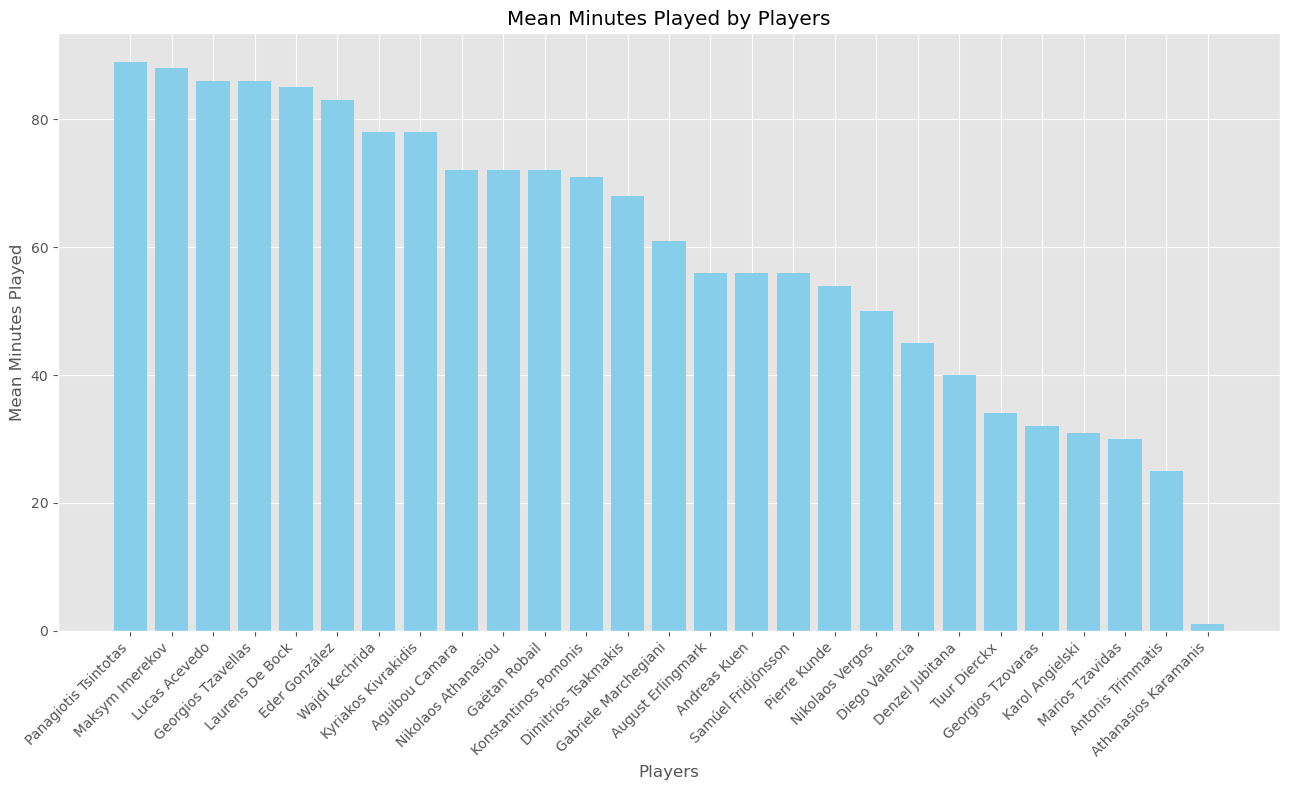

In [111]:
plt.figure(figsize=(13, 8))
plt.bar(df_club_players['name'], df_club_players['mean_minutes_played'], color='skyblue')
plt.xlabel('Players')
plt.ylabel('Mean Minutes Played')
plt.title('Mean Minutes Played by Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()